In [111]:
from datatypes import *
from train_dm import *
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams['text.usetex'] = True

In [112]:
path='example_outputs/run_262/'
repeats=25
dmax=25

datapath=path+'/eval.txt'

with open(os.path.join(path, 'args.json'), 'r') as f:
    args = json.load(f)

n=args['n']
l=args['l']

In [113]:
data=np.loadtxt(datapath,usecols=[1,3,5])


In [114]:
values=np.zeros((dmax,repeats))

for i, j, value in data:
    i=int(i)
    j=int(j)
    if i<dmax and j<repeats:
        values[i,j]=value


In [115]:

valtext=r"$\langle\psi^*|\rho_{out}|\psi^*\rangle$"

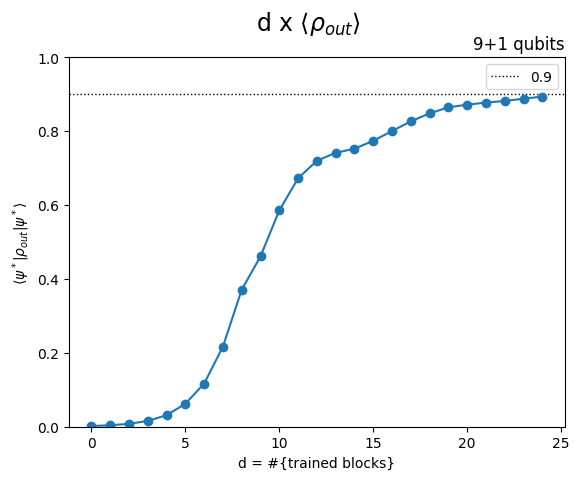

In [116]:

plt.axhline(y=0.9, color='k', linestyle=':',lw=1,label='0.9')
plt.ylim((0,1))
plt.plot(values[:,1],'o-')
plt.xlabel('d = #{trained blocks}')
plt.ylabel(valtext)
plt.legend()
plt.suptitle(r"d x $\langle\rho_{out}\rangle$", fontsize=17)
plt.title(f"{n}+1 qubits",loc='right')
plt.savefig(path+'/trained_blocks_norepeat.pdf')
plt.savefig(path+'/trained_blocks_norepeat.png')
plt.show()

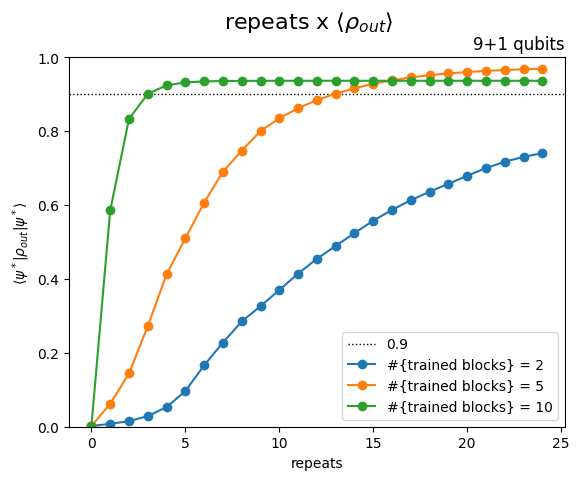

In [117]:
plt.axhline(y=0.9, color='k', linestyle=':',lw=1,label='0.9')
plt.ylim((0,1))
plt.plot(values[2],'o-',label='#{trained blocks} = 2')
plt.plot(values[5],'o-',label='#{trained blocks} = 5')
plt.plot(values[10],'o-',label='#{trained blocks} = 10')
plt.xlabel('repeats')
plt.ylabel(valtext)
plt.legend()
plt.suptitle(r"repeats x $\langle\rho_{out}\rangle$", fontsize=16)
plt.title(f"{n}+1 qubits",loc='right')
plt.savefig(path+'/repeats.pdf')
plt.savefig(path+'/repeats.png')
plt.show()

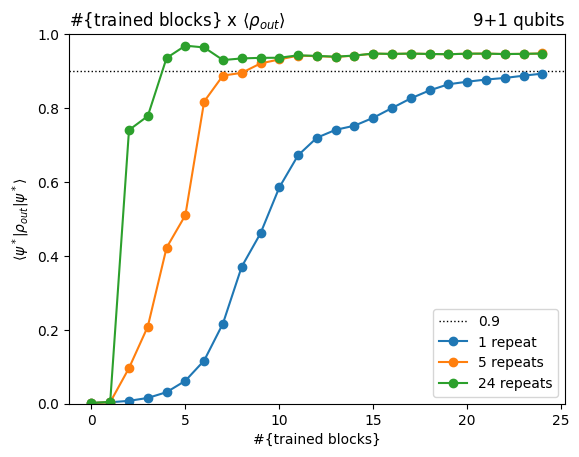

In [118]:
plt.axhline(y=0.9, color='k', linestyle=':',lw=1,label='0.9')
plt.ylim((0,1))
plt.plot(values[:,1],'o-',label='1 repeat')
plt.plot(values[:,5],'o-',label='5 repeats')
plt.plot(values[:,24],'o-',label='24 repeats')
plt.xlabel('#{trained blocks}')
plt.ylabel(valtext)
plt.legend()
plt.title(r"#{trained blocks} x $\langle\rho_{out}\rangle$",loc='left')
plt.title(f"{n}+1 qubits",loc='right')
plt.savefig(path+'/trained_blocks.pdf')
plt.savefig(path+'/trained_blocks.png')
plt.show()

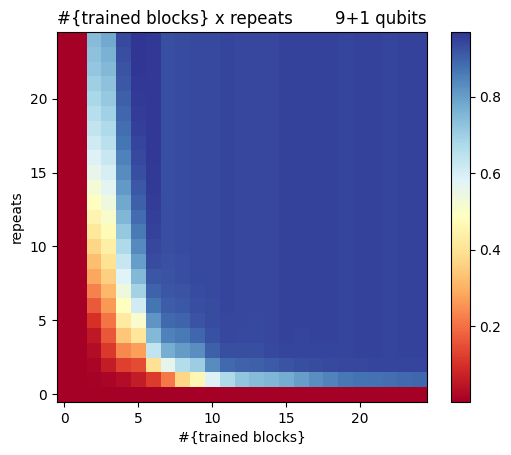

In [119]:

im=plt.imshow(values.T, interpolation='nearest',origin='lower',cmap='RdYlBu')
plt.colorbar(im)
plt.xlabel('#{trained blocks}')
plt.ylabel('repeats')
plt.savefig(path+'/heatmap.pdf')
plt.savefig(path+'/heatmap.png')
#plt.title('Expected value of output state (#trained blocks x repeats)')
#plt.title(valtext+" (#trained blocks x repeats)")
plt.title("#{trained blocks} x repeats",loc='left')
plt.title(f"{n}+1 qubits",loc='right')
plt.show()